In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# import sys 
# print(sys.executable)

In [2]:
df_train = pd.read_csv('train.csv')
train_end_idx = len(df_train) 
df_test = pd.read_csv('test.csv')
df_test['RainToday'] = np.zeros((len(df_test),))

In [3]:
# merge 'train.csv' and 'test.csv' for convenience, fill RainToday in 'test.csv' with 0
df = pd.concat([df_train, df_test], sort=False)
df.head(20)

,Date,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2016-07-19,NaN,19.5,NaN,5.69496,0.500000,ENE,61.00000,ENE,ENE,...,86.641375,41.810006,1020.4,1021.9,NaN,7.00000,NaN,19.6,0.0,NaN
1,2010-07-26,Canberra,2.1,15.7,NaN,5.700000,E,26.00000,NaN,SE,...,53.275715,76.598048,1023.7,1020.8,4.000000,1.00000,9.0,14.1,0.0,0.0
2,2014-04-02,Woomera,20.9,36.1,5.69496,NaN,S,39.00000,S,SW,...,15.471574,52.163254,1017.1,1014.9,4.167266,4.27812,24.2,33.9,0.0,0.0
3,2014-11-19,Tuggeranong,11.5,23.9,5.69496,7.993227,NNE,35.00000,W,NaN,...,46.442398,67.664733,1010.2,NaN,4.167266,4.27812,13.8,21.8,1.0,0.2
4,NaN,Hobart,8.2,20.5,3.20000,NaN,N,69.00000,N,WNW,...,51.830889,51.770240,NaN,1001.2,7.000000,7.00000,NaN,17.6,0.0,0.6
5,2013-05-23,Tuggeranong,9.7,24.1,5.69496,NaN,NE,31.00000,SE,E,...,49.816899,58.470225,1022.9,NaN,4.167266,4.27812,17.8,23.2,0.0,0.0
6,2010-07-23,NaN,6.0,12.8,1.00000,7.400000,WSW,NaN,WSW,W,...,70.879656,59.672191,1029.4,1030.3,NaN,4.00000,NaN,NaN,1.0,2.4
7,2017-06-01,NaN,7.1,15.5,2.40000,7.993227,NaN,35.00000,SSW,S,...,39.138422,68.123428,1024.0,NaN,1.000000,4.00000,9.6,14.8,0.0,0.0
8,2010-11-28,NorahHead,16.5,25.4,5.69496,7.993227,NNE,NaN,NNE,NE,...,63.983249,60.008262,1004.7,1000.8,4.167266,4.27812,18.9,21.7,0.0,0.0
9,2014-04-07,Nuriootpa,NaN,13.8,4.70000,5.200000,NaN,65.00000,W,WSW,...,58.973981,68.960339,1014.8,NaN,NaN,4.27812,10.1,12.0,1.0,3.0


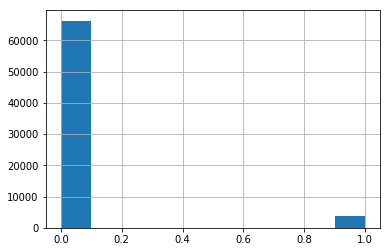

In [4]:
y = df.RainToday
y.hist()

### Deal with missing values

In [5]:
# Deal with Date
parsed_date = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df['month'] = parsed_date.dt.month
df['month'].fillna(df['month'].value_counts().index[0], inplace=True)
df = df.drop(columns = ['Date'])

#### Feature engineering

In [6]:
# init categorical
catCols = ['Location','WindGustDir', 'WindDir9am', 'WindDir3pm']

# init numeric
numCols = ['MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm','Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']

In [7]:
# Get intraday columns
am_cols = sorted([c for c in numCols if c.endswith('9am')])
pm_cols = sorted([c for c in numCols if c.endswith('3pm')])

# Add intraday delta
for am_col, pm_col in zip(am_cols, pm_cols):
    df[am_col[:-3] + '_delta'] = df[pm_col] - df[am_col]

# Add max temp - min temp delta
df['MinMaxTemp_delta'] = df.MaxTemp - df.MinTemp


df['Q1'] = df['month'].apply(lambda x: 1 if x==1 or x==2 or x==12 else 0)
df['Q2'] = df['month'].apply(lambda x: 1 if x>=3 and x<=5 else 0)
df['Q3'] = df['month'].apply(lambda x: 1 if x>=6 and x<=8 else 0)
df['Q4'] = df['month'].apply(lambda x: 1 if x>=9 and x<=11 else 0)
df = df.drop(columns = ['month'])

In [8]:
df.head(20)

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud_delta,Humidity_delta,Pressure_delta,Temp_delta,WindSpeed_delta,MinMaxTemp_delta,Q1,Q2,Q3,Q4
0,NaN,19.5,NaN,5.69496,0.500000,ENE,61.00000,ENE,ENE,31.0,...,NaN,-44.831370,1.5,NaN,-9.0,NaN,0,0,1,0
1,Canberra,2.1,15.7,NaN,5.700000,E,26.00000,NaN,SE,9.0,...,-3.000000,23.322333,-2.9,5.1,-2.0,13.6,0,0,1,0
2,Woomera,20.9,36.1,5.69496,NaN,S,39.00000,S,SW,31.0,...,0.110854,36.691681,-2.2,9.7,-14.0,15.2,0,1,0,0
3,Tuggeranong,11.5,23.9,5.69496,7.993227,NNE,35.00000,W,NaN,7.0,...,0.110854,21.222336,NaN,8.0,10.0,12.4,0,0,0,1
4,Hobart,8.2,20.5,3.20000,NaN,N,69.00000,N,WNW,NaN,...,0.000000,-0.060649,NaN,NaN,NaN,12.3,1,0,0,0
5,Tuggeranong,9.7,24.1,5.69496,NaN,NE,31.00000,SE,E,11.0,...,0.110854,8.653325,NaN,5.4,8.0,14.4,0,1,0,0
6,NaN,6.0,12.8,1.00000,7.400000,WSW,NaN,WSW,W,28.0,...,NaN,-11.207465,0.9,NaN,-2.0,6.8,0,0,1,0
7,NaN,7.1,15.5,2.40000,7.993227,NaN,35.00000,SSW,S,15.0,...,3.000000,28.985006,NaN,5.2,-2.0,8.4,0,0,1,0
8,NorahHead,16.5,25.4,5.69496,7.993227,NNE,NaN,NNE,NE,26.0,...,0.110854,-3.974986,-3.9,2.8,NaN,8.9,0,0,0,1
9,Nuriootpa,NaN,13.8,4.70000,5.200000,NaN,65.00000,W,WSW,28.0,...,NaN,9.986358,NaN,1.9,5.0,NaN,0,1,0,0


In [9]:
# Get categoricals and numericals
cat_cols = list(df.select_dtypes(include=object).columns)
# cat_cols.append('month')
num_cols = [c for c in df.columns if c not in cat_cols and c!='RainToday']

In [10]:
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [11]:
num_cols

['MinTemp',
 'MaxTemp',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM',
 'Cloud_delta',
 'Humidity_delta',
 'Pressure_delta',
 'Temp_delta',
 'WindSpeed_delta',
 'MinMaxTemp_delta',
 'Q1',
 'Q2',
 'Q3',
 'Q4']

In [12]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in cat_cols[:]:
    df[col] = enc.fit_transform(df[col].fillna('NaN'))

In [13]:
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        - Columns of dtype object are imputed with the most frequent value 
        in column.
        - Columns of other types are imputed with mean of column.
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0] if X[c].dtype == np.dtype('O')
                               else X[c].mean() for c in X],
                              index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [14]:
df = DataFrameImputer().fit_transform(df)

In [15]:
# df.head(10)

In [16]:
# for col in catCols:
#     df[col] = enc.fit_transform(df[col])

In [17]:
df.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud_delta,Humidity_delta,Pressure_delta,Temp_delta,WindSpeed_delta,MinMaxTemp_delta,Q1,Q2,Q3,Q4
0,24,19.5,23.741634,5.694960,0.500000,1,61.0,1,1,31.000000,...,0.114131,-44.831370,1.50000,5.003289,-9.000000,11.619364,0,0,1,0
1,9,2.1,15.700000,5.701668,5.700000,0,26.0,8,10,9.000000,...,-3.000000,23.322333,-2.90000,5.100000,-2.000000,13.600000,0,0,1,0
2,49,20.9,36.100000,5.694960,8.003251,9,39.0,9,13,31.000000,...,0.110854,36.691681,-2.20000,9.700000,-14.000000,15.200000,0,1,0,0
3,41,11.5,23.900000,5.694960,7.993227,5,35.0,14,8,7.000000,...,0.110854,21.222336,-2.58297,8.000000,10.000000,12.400000,0,0,0,1
4,15,8.2,20.500000,3.200000,8.003251,3,69.0,3,15,13.739091,...,0.000000,-0.060649,-2.58297,5.003289,4.695519,12.300000,1,0,0,0


### Divide into training and testing

In [18]:
from sklearn.model_selection import train_test_split

# as nd.array
# X_train, X_test, y_train, y_test = train_test_split(
#     df.drop(columns = ['RainToday']).values[:train_end_idx, :],
#     df['RainToday'].values[:train_end_idx],
#     test_size=0.3, random_state=66)

# save as pd
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns = ['RainToday']).iloc[:train_end_idx, :],
    df['RainToday'].iloc[:train_end_idx],
    test_size=0.3, random_state=42)

# test.csv
# X_ans = df.drop(columns = ['RainToday']).values[train_end_idx:, :]
X_ans = df.drop(columns = ['RainToday']).iloc[train_end_idx:, :]

In [19]:
X_train.head()

,Location,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Cloud_delta,Humidity_delta,Pressure_delta,Temp_delta,WindSpeed_delta,MinMaxTemp_delta,Q1,Q2,Q3,Q4
9309,24,25.600000,32.200000,6.80000,10.700000,8,28.000000,5,5,9.000000,...,-3.000000,-7.440504,-3.20000,2.100000,8.000000,6.600000,1,0,0,0
6619,24,12.110114,20.000000,3.40000,7.993227,7,39.366587,7,5,15.000000,...,1.832734,8.311482,-4.60000,8.500000,-6.000000,11.619364,1,0,0,0
5134,41,-3.500000,23.741634,5.69496,7.993227,3,30.000000,8,6,0.000000,...,0.114131,26.971057,-2.58297,10.400000,15.000000,11.619364,1,0,0,0
635,48,13.600000,18.900000,5.69496,7.993227,15,22.000000,13,1,15.000000,...,0.110854,0.464331,-2.80000,3.200000,-2.000000,5.300000,1,0,0,0
14454,41,6.500000,19.800000,5.69496,8.003251,3,19.000000,15,5,13.739091,...,0.114131,1.276422,-4.10000,5.003289,4.695519,13.300000,1,0,0,0


### Use one-hot encoder for nominal catagories, and standardize integer features

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)])

In [ ]:
# X_train = preprocessor.fit_transform(X_train)
# X_train.shape

In [ ]:
# X_test = preprocessor.fit_transform(X_test)
# X_test.shape

In [ ]:
y_train.values

### Model Building

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [32]:
tree = DecisionTreeClassifier(criterion='entropy')
dtc = make_pipeline(preprocessor,
                    tree)

dtc.fit(X_train, y_train)

#predict
y_pred_decision = dtc.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred_decision))
print('precision-score: %f' % precision_score(y_test, y_pred_decision))
print('recall-score: %f' % recall_score(y_test, y_pred_decision))
print('f1-score: %f' % f1_score(y_test, y_pred_decision))

Accuracy: 0.851996
precision-score: 0.313933
recall-score: 0.312555
f1-score: 0.313242


In [33]:
from sklearn.linear_model import LogisticRegression

lr = make_pipeline(preprocessor,
                   LogisticRegression(solver = 'liblinear')
                   )
lr.fit(X_train, y_train)

y_pred_decision = lr.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred_decision))
print('f1-score: %f' % f1_score(y_test, y_pred_decision))

Accuracy: 0.899403
f1-score: 0.276755


### Try stacking

#### Reference:
https://www.kaggle.com/arcaputo3/model-stacking-upsampling-pca-australia-rain

In [34]:
from pprint import pprint

# weak learners
models = {
    'LogisticRegression': LogisticRegression(solver = 'liblinear'),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy'),
    
    'AdaBoostClassifier': AdaBoostClassifier(),
    # Use log loss so we can get probability predictions
    'SGDClassifier': linear_model.SGDClassifier(loss='log', n_jobs=-1),
    
    'GradientBoostingClassifier': GradientBoostingClassifier(
            n_estimators=500, max_depth=5),
}

pprint(models)

{'AdaBoostClassifier': AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None),
 'DecisionTreeClassifier': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 'GradientBoostingClassifier': GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_

Fit these learners to the training data and create a new level 2 training set where each column represents the predictions Y_A of model A.

We will need to genereate these predictions "out-of-fold," meaning that we will divide our data into K-folds and for each fold fit the model on the other K-1 folds and predict on the hold-out fold. This will avoid generating leakage for in final model. For more information, see this article on model stacking: https://www.kdnuggets.com/2017/02/stacking-models-imropved-predictions.html.

In [35]:
# Some useful parameters which will come in handy later on
ntrain = X_train.shape[0]
ntest = X_test.shape[0]

from sklearn.model_selection import KFold

SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=SEED)

# generate out-of-fold predicitions.
def get_oof(clf, x_train=X_train, y_train=y_train, x_test=X_test):
    """ Get's out of fold predictions for a classifier. 
        Credit: https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
        Slightly modified to handle sklearn 0.20.3
    """
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr, y_tr)
        # Use predict_proba and get confidence of model predicting 1 = 'Yes'
        oof_train[test_index] = clf.predict_proba(x_te)[:, 1]
        # For test set, we use each of the 5 folds
        oof_test_skf[i, :] = clf.predict_proba(x_test)[:, 1]

    # and average predictions
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train, oof_test

In [36]:
new_X_train, new_X_test = pd.DataFrame(), pd.DataFrame()
a = preprocessor.fit_transform(X_train)
b = preprocessor.fit_transform(X_test)

for key, clf in models.items():
        new_X_train[key], new_X_test[key] = get_oof(clf, a, y_train.values, b)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_f = pd.DataFrame(scaler.fit_transform(new_X_train), columns=new_X_train.columns)
X_test_f = pd.DataFrame(scaler.transform(new_X_test), columns=new_X_test.columns)

# X_train_f = pd.DataFrame(new_X_train, columns=new_X_train.columns)
# X_test_f = pd.DataFrame(new_X_test, columns=new_X_test.columns)

In [39]:
X_train_f.head(10)

,LogisticRegression,DecisionTreeClassifier,AdaBoostClassifier,SGDClassifier,GradientBoostingClassifier
0,0.034955,0.0,0.838826,0.036284,0.003995
1,0.023548,0.0,0.845799,0.022666,0.014560
2,0.038618,0.0,0.869260,0.028437,0.009196
3,0.054043,0.0,0.889287,0.058863,0.030157
4,0.027675,0.0,0.820114,0.009803,0.933299
5,0.456981,0.0,0.925226,0.445267,0.443794
6,0.199651,0.0,0.899387,0.171524,0.138890
7,0.064685,0.0,0.876934,0.055908,0.144505
8,0.139568,0.0,0.886895,0.226750,0.101180
9,0.129846,0.0,0.870894,0.184205,0.061804


### Non-upsample model

In [40]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBClassifier

In [41]:
def get_cv_model(X, y):
    """ Given a dataset, performs cross-validation on an XGBoost model 
        and returns best one. Scoring: F1-Score. """
    # A parameter grid for XGBoost
    params = {
            'min_child_weight': [1, 6, 8, 10],
            'gamma': [0.3, 0.5, 1, 1.5],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [4, 5, 6]
            }
    # Get model
    clf_xgb = XGBClassifier(learning_rate=0.3, 
                            n_estimators=300, 
                            objective='binary:logistic',
                            eval_metric ='auc',
                            silent=True, 
                            nthread=4)
    # Get best hyperparameters
    random_search = RandomizedSearchCV(clf_xgb, 
                                       param_distributions=params, 
                                       n_iter=8, 
                                       scoring='f1', 
                                       n_jobs=-1, cv=5, 
                                       verbose=3, random_state=115)
    random_search.fit(X, y)
    print('\n Best estimator:')
    print(random_search.best_estimator_)
    print('\n Best F1 score')
    print(random_search.best_score_)
    print('\n Best hyperparameters:')
    print(random_search.best_params_)
    return random_search

In [42]:
# Get non-upsampled model
random_search = get_cv_model(X_train_f, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.2min finished



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
              gamma=1.5, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=8, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=0.6, verbosity=1)

 Best F1 score
0.31286811689541216

 Best hyperparameters:
{'subsample': 0.6, 'min_child_weight': 8, 'max_depth': 6, 'gamma': 1.5, 'colsample_bytree': 0.8}


### Up-sample model

In [45]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy=0.6, random_state=42, n_jobs=4)
X_train_f_sm, y_train_sm = smt.fit_sample(X_train_f, y_train)
# Ensure columns are homogeneous - imblearn recasts as numpy array
X_train_f_sm = pd.DataFrame(X_train_f_sm, columns=X_train_f.columns)

(array([16214.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10499.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

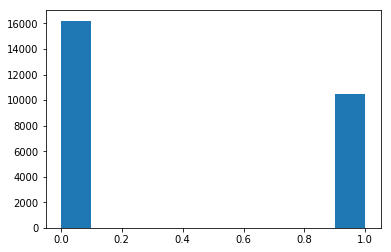

In [46]:
plt.hist(y_train_sm)

In [47]:
random_search_u = get_cv_model(X_train_f_sm, y_train_sm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.6min finished



 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, eval_metric='auc',
              gamma=1, learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=True, subsample=1.0, verbosity=1)

 Best F1 score
0.8932800376836116

 Best hyperparameters:
{'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 6, 'gamma': 1, 'colsample_bytree': 1.0}


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get final scores
def final_scores(model=random_search, X_test=X_test_f, y_test=y_test, upsample=False, model_name='Stacked XGBClassifier'):
    y_pred = model.predict(X_test)
    if upsample: print('-- Upsampled --')
    print(f'--- {model_name} Results ---')
    print('Test F1 Score: ', f1_score(y_test, y_pred)) 
    print('\n Classification Report: ')
    print(classification_report(y_test, y_pred))
    print('\n Confusion Matrix: ')
    print(confusion_matrix(y_test, y_pred))
    print('\n Test Accuracy Score: ', accuracy_score(y_test, y_pred))

In [53]:
final_scores(model=random_search_u, upsample=True)

-- Upsampled --
--- Stacked XGBClassifier Results ---
Test F1 Score:  0.4322678843226789

 Classification Report: 
              precision    recall  f1-score   support

         0.0       0.96      0.79      0.87      9408
         1.0       0.30      0.75      0.43      1139

    accuracy                           0.79     10547
   macro avg       0.63      0.77      0.65     10547
weighted avg       0.89      0.79      0.82     10547


 Confusion Matrix: 
[[7457 1951]
 [ 287  852]]

 Test Accuracy Score:  0.7878069593249265


In [ ]:
new_X_ans, new_X_test = pd.DataFrame(), pd.DataFrame()
a = preprocessor.fit_transform(X_ans)
b = preprocessor.fit_transform(X_test)

for key, clf in models.items():
        new_X_ans[key], new_X_test[key] = get_oof(clf, a, y_train.values, b)

In [ ]:
ans_pred = random_search_u.predict(X_ans)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['RainToday'])
df_sap.to_csv('xgb0512.csv',  index_label = 'Id')

=====> Turns out that stacking didn't help much in this case

### Re-sampling

In [21]:
from imblearn import under_sampling, over_sampling
from imblearn.combine import SMOTEENN
# from imblearn.combine import SMOTETomek
# from imblearn.over_sampling import SMOTE

smt = SMOTEENN(sampling_strategy=0.5, random_state=42, n_jobs=4)
# smt = SMOTETomek(sampling_strategy=0.8, random_state=42, n_jobs=4)
# smt = SMOTE(random_state=42, n_jobs=2)

X_smt, y_smt = smt.fit_sample(X_train, y_train)

target_count = y_smt.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

Class 0: 14971
Class 1: 10324
Proportion: 1.45 : 1


In [ ]:
X_smt.head()

## Model seleciton

#### XGB

In [22]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

from xgboost.sklearn import XGBClassifier

Reference: information about xgb parameters
https://www.jishuwen.com/d/2Rz3/zh-tw?fbclid=IwAR2zi33dWptKTl0Vqsyt6cOoLpHUj-SrmoHKAiBIjvd-28CMkb18-yeghjs

In [23]:
# before up-sampling
clf = XGBClassifier(
    silent=0,  # 設定成1則沒有執行資訊輸出，最好是設定為0，是否在執行升級時列印訊息
    nthread = 4, # CPU 執行緒數 預設最大
    learning_rate=0.3 , # 如同學習率
    min_child_weight = 8,
    # 這個引數預設為1，是每個葉子裡面h的和至少是多少，對正負樣本不均衡時的0-1分類而言
    # 假設h在0.01附近，min_child_weight為1 意味著葉子節點中最少需要包含100個樣本
    # 這個引數非常影響結果，控制葉子節點中二階導的和的最小值，該引數值越小，越容易過擬合
    max_depth=6, # 構建樹的深度，越大越容易過擬合
    gamma = 1,# 樹的葉子節點上做進一步分割槽所需的最小損失減少，越大越保守，一般0.1 0.2這樣子
    subsample=0.6, # 隨機取樣訓練樣本，訓練例項的子取樣比
    max_delta_step=0,  # 最大增量步長，我們允許每個樹的權重估計
    colsample_bytree=0.8, # 生成樹時進行的列取樣
    reg_lambda=1, #控制模型複雜度的權重值的L2正則化項引數，引數越大，模型越不容易過擬合
    # reg_alpha=0, # L1正則項引數
    scale_pos_weight=1, # 如果取值大於0的話，在類別樣本不平衡的情況下有助於快速收斂，平衡正負權重
    # objective = 'multi:softmax', # 多分類問題，指定學習任務和響應的學習目標
    # num_class = 10,  # 類別數，多分類與multisoftmax並用
    n_estimators=100,  # 樹的個數
    seed = 1000,  # 隨機種子
    eval_metric ='auc'
)

xgbclf = make_pipeline(preprocessor, clf)
xgbclf.fit(X_train, y_train)
y_pred_decision = xgbclf.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred_decision))
print('precision-score: %f' % precision_score(y_test, y_pred_decision))
print('recall-score: %f' % recall_score(y_test, y_pred_decision))
print('f1-score: %f' % f1_score(y_test, y_pred_decision))

Accuracy: 0.899687
precision-score: 0.577438
recall-score: 0.265145
f1-score: 0.363418


In [30]:
# after up-sampling
clf = XGBClassifier(
    silent=0, 
    nthread = 4, 
    learning_rate=0.3 , 
    min_child_weight = 1,
    max_depth=6, 
    gamma = 0.3,
    subsample=1, 
    max_delta_step=0,  
    colsample_bytree=0.8, 
    reg_lambda=1, 
    # reg_alpha=0, 
    scale_pos_weight=1,
    # objective = 'multi:softmax', 
    # num_class = 10, 
    n_estimators=300,
    seed = 1000,
    eval_metric ='auc'
)

xgbclf = make_pipeline(preprocessor, clf)
xgbclf.fit(X_smt, y_smt)
y_pred_decision = xgbclf.predict(X_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred_decision))
print('precision-score: %f' % precision_score(y_test, y_pred_decision))
print('recall-score: %f' % recall_score(y_test, y_pred_decision))
print('f1-score: %f' % f1_score(y_test, y_pred_decision))

Accuracy: 0.868209
precision-score: 0.418134
recall-score: 0.562774
f1-score: 0.479790


### Feature Selection

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(25,22))
plot_importance(clf, ax=ax)

In [ ]:
preprocessor.fit(X_smt)
new_X_smt = preprocessor.transform(X_smt)
new_test = preprocessor.transform(X_test)

In [ ]:
clf.fit(new_X_smt, y_smt)
y_pred = clf.predict(new_test)
print('Accuracy: %f' % accuracy_score(y_test, y_pred))
print('f1-score: %f' % f1_score(y_test, y_pred))

In [ ]:
from sklearn.decomposition import PCA

X_train_preprocessed = preprocessor.fit_transform(X_train)

pca = PCA(n_components=0.5)

X_train_reduced = pca.fit_transform(X_train_preprocessed)
print(' The number of features is %d out of 22 after PCA with n_components=0.99.' %pca.n_components_)

## Submit

In [ ]:
ans_pred = xgbclf.predict(X_ans)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['RainToday'])
df_sap.to_csv('xgb0512.csv',  index_label = 'Id')